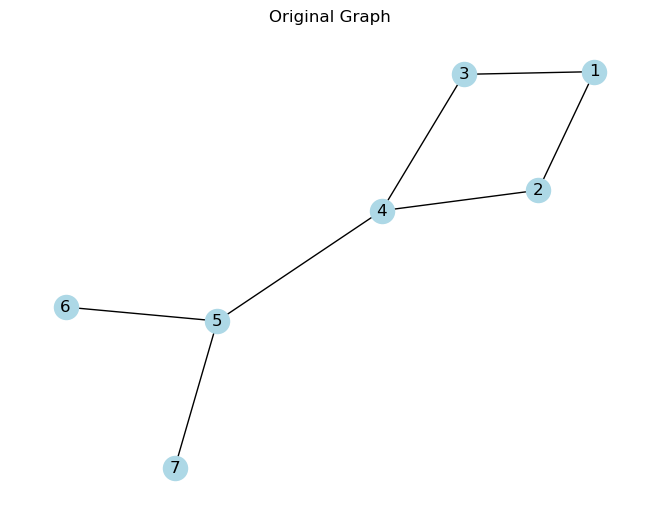

(1, {'eigvec': 0.4243715549143559})
Node 1: Eigenvector entry: 0.4244
(2, {'eigvec': 0.34823642840328023})
Node 2: Eigenvector entry: 0.3482
(3, {'eigvec': 0.34823642840328})
Node 3: Eigenvector entry: 0.3482
(4, {'eigvec': 0.14714936189896088})
Node 4: Eigenvector entry: 0.1471
(5, {'eigvec': -0.307823952178552})
Node 5: Eigenvector entry: -0.3078
(6, {'eigvec': -0.4800849107206615})
Node 6: Eigenvector entry: -0.4801
(7, {'eigvec': -0.4800849107206615})
Node 7: Eigenvector entry: -0.4801


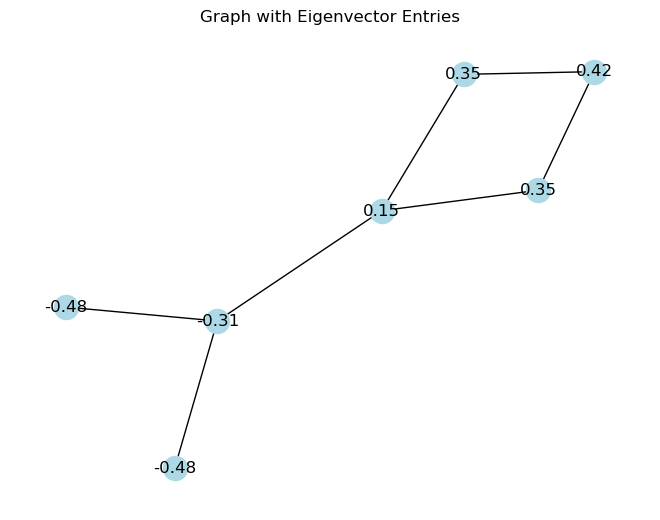

In [1]:
# Step 1: Import necessary libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create a graph
# We will create a simple undirected graph for demonstration.
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7)])

# Step 3: Draw the graph
pos = nx.spring_layout(G)  # Use spring layout for better visual arrangement
nx.draw(G, pos, with_labels=True, node_color='lightblue')
plt.title("Original Graph")
plt.show()

# Step 4: Compute the Laplacian matrix of the graph
L = nx.laplacian_matrix(G).toarray()

# Step 5: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(L)

# Step 6: Find the index of the smallest non-zero eigenvalue
# We ignore the first eigenvalue if it is zero (it should be for a connected graph)
non_zero_eigenvalues = [(i, val) for i, val in enumerate(eigenvalues) if val > 1e-10]
idx, val = non_zero_eigenvalues[0]

# Step 7: Assign the entries of the corresponding eigenvector as node attributes
nx.set_node_attributes(G, {(i+1): eigenvectors[i,idx] for i in range(len(G.nodes()))}, 'eigvec')

# Step 8: Print node attributes to verify
for node in G.nodes(data=True):
    print(node)
    print(f"Node {node[0]}: Eigenvector entry: {node[1]['eigvec']:.4f}")

# Optionally, display the graph with node labels showing eigenvector entries
node_labels = {node: f"{node_attrs['eigvec']:.2f}" for node, node_attrs in G.nodes(data=True)}
nx.draw(G, pos, labels=node_labels, with_labels=True, node_color='lightblue')
plt.title("Graph with Eigenvector Entries")
plt.show()
